<a href="https://colab.research.google.com/github/DharanisriPalanisamy/EY_Techathon/blob/main/ey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving NEV_fault_dataset new.csv to NEV_fault_dataset new.csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving NEV_fault_dataset new.csv to NEV_fault_dataset new (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('NEV_fault_dataset new.csv')
df.head()


,Fault Label,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%)
0,0.0,9.389.222.561.858.270,19.953.520.847.257.500,5.444.030.305.614.170,23.950.804.238.730.900,3.012.837.712.138.580,5.824.351.728.359.610,3.973.396.531.120.100
1,0.0,9.543.699.325.140.040,12.117.506.772.672.700,9.627.712.888.003.810,3.779.416.084.171.510,7.061.867.140.317.350,7.767.233.474.874.770,5.025.524.977.931.410
2,0.0,8.104.640.450.186.150,382.501.409.468.062,5.572.228.902.612.280,4.869.387.373.245.660,7.883.388.406.870.150,3.263.498.763.039.200,16.849.267.652.363.600
3,0.0,9.665.762.073.479.400,24.026.179.474.791.700,9.065.794.097.478.730,4.047.195.354.547.190,1.551.860.959.418.050,780.072.077.989.834,7.041.054.130.991.420
4,0.0,8.382.145.574.284.380,3.078.129.493.167.370,2.354.583.171.880.980,4.261.761.062.128.550,28.754.710.399.280.800,9.240.887.255.059.420,6.262.884.930.517.110


In [ ]:
df.shape          # shows number of rows & columns
df.columns        # lists all column names
df.info()         # shows column data types & missing values
df.describe()     # quick numeric summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fault Label        11000 non-null  float64
 1   Voltage (V)        11000 non-null  object 
 2   Current (A)        11000 non-null  object 
 3   Motor Speed (RPM)  11000 non-null  object 
 4   Temperature (°C)   11000 non-null  object 
 5   Vibration (g)      11000 non-null  object 
 6   Ambient Temp (°C)  11000 non-null  object 
 7   Humidity (%)       11000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 687.6+ KB


,Fault Label
count,11000.000000
mean,1.090909
std,1.164257
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,3.000000


In [ ]:
df = df.drop_duplicates()
df = df.fillna(df.mean(numeric_only=True))


In [ ]:
df.columns



Index(['Fault Label', 'Voltage (V)', 'Current (A)', 'Motor Speed (RPM)',
       'Temperature (°C)', 'Vibration (g)', 'Ambient Temp (°C)',
       'Humidity (%)'],
      dtype='object')

(array([550., 550., 550., 550., 550., 550., 550., 550., 550., 550., 550.,
        550., 550., 550., 550., 550., 550., 550., 550., 550.]),
 array([    0.  ,   549.95,  1099.9 ,  1649.85,  2199.8 ,  2749.75,
         3299.7 ,  3849.65,  4399.6 ,  4949.55,  5499.5 ,  6049.45,
         6599.4 ,  7149.35,  7699.3 ,  8249.25,  8799.2 ,  9349.15,
         9899.1 , 10449.05, 10999.  ]),
 <BarContainer object of 20 artists>)

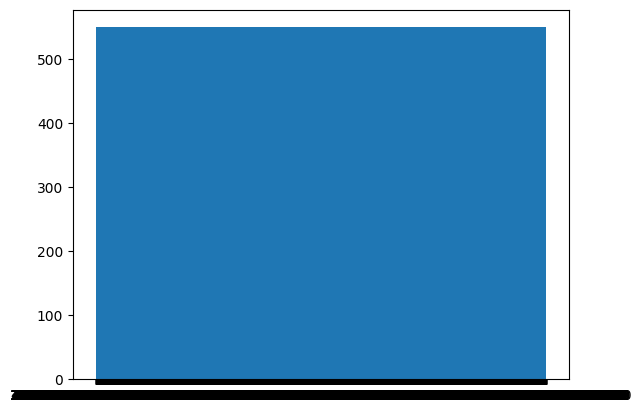

In [ ]:
plt.hist(df['Temperature (°C)'], bins=20)

In [ ]:
import numpy as np

synthetic = df.sample(10, replace=True).copy()
synthetic['Vehicle_ID'] = [f'VEH_{i:03d}' for i in range(1, 11)]
synthetic.head()


,Fault Label,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%),Vehicle_ID
5395,1.0,8.470.024.195.912.610,6.952.596.966.366.860,17.291.388.746.722.300,445.391.896.156.041,6.422.587.467.286.530,5.084.559.528.621.720,26.211.469.985.944.100,VEH_001
8788,2.0,6.699.671.909.772.210,15.737.489.032.459.200,9.804.464.731.610.980,4.428.423.236.929.350,33.298.105.115.083.800,13.964.758.535.048.200,7.857.743.008.528.980,VEH_002
2183,0.0,874.187.914.297.827,18.808.433.059.482.300,7.341.515.890.963.150,46.739.909.374.757.800,2.045.641.166.421.370,9.976.288.406.898.710,792.581.513.085.091,VEH_003
5673,1.0,9.326.447.326.800.160,39.918.710.585.600.400,44.375.141.235.173.700,5.592.617.813.871.250,9.539.132.893.246.360,6.486.335.826.666.130,7.286.297.254.494.260,VEH_004
9995,3.0,18.461.688.198.287.600,1.937.621.114.125.550,386.327.851.263.933,8.364.553.221.124.530,18.433.118.156.151.100,8.627.389.457.597.980,4.202.730.754.766.920,VEH_005


In [ ]:
cols_to_fix = ['Voltage (V)', 'Current (A)', 'Motor Speed (RPM)',
               'Temperature (°C)', 'Vibration (g)', 'Ambient Temp (°C)', 'Humidity (%)']

for col in cols_to_fix:
    synthetic[col] = (
        synthetic[col]
        .astype(str)                              # make sure it's string
        .str.replace(r'[^0-9]', '', regex=True)   # remove ALL non-digit characters (like . or ,)
        .astype(float)                            # convert to float
    )



In [ ]:
synthetic['Voltage (V)'] = synthetic['Voltage (V)'] / 1000000
synthetic['Current (A)'] = synthetic['Current (A)'] / 1000000
synthetic['Temperature (°C)'] = synthetic['Temperature (°C)'] / 1000000
synthetic['Vibration (g)'] = synthetic['Vibration (g)'] / 1000000
synthetic['Ambient Temp (°C)'] = synthetic['Ambient Temp (°C)'] / 1000000
synthetic['Humidity (%)'] = synthetic['Humidity (%)'] / 1000000


In [ ]:
synthetic[cols_to_fix].head()


,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%)
5395,8.470024e+09,6.952597e+09,1.729139e+16,4.453919e+08,6.422587e+09,5.084560e+09,2.621147e+10
8788,6.699672e+09,1.573749e+10,9.804465e+15,4.428423e+09,3.329811e+10,1.396476e+10,7.857743e+09
2183,8.741879e+08,1.880843e+10,7.341516e+15,4.673991e+10,2.045641e+09,9.976288e+09,7.925815e+08
5673,9.326447e+09,3.991871e+10,4.437514e+16,5.592618e+09,9.539133e+09,6.486336e+09,7.286297e+09
9995,1.846169e+10,1.937621e+09,3.863279e+14,8.364553e+09,1.843312e+10,8.627389e+09,4.202731e+09


In [ ]:
# Scale down unrealistic values
synthetic['Voltage (V)'] = synthetic['Voltage (V)'] / 1e7
synthetic['Current (A)'] = synthetic['Current (A)'] / 1e8
synthetic['Motor Speed (RPM)'] = synthetic['Motor Speed (RPM)'] / 1e12
synthetic['Temperature (°C)'] = synthetic['Temperature (°C)'] / 1e9
synthetic['Vibration (g)'] = synthetic['Vibration (g)'] / 1e9
synthetic['Ambient Temp (°C)'] = synthetic['Ambient Temp (°C)'] / 1e9
synthetic['Humidity (%)'] = synthetic['Humidity (%)'] / 1e9

synthetic.head()


,Fault Label,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%),Vehicle_ID
5395,1.0,847.002420,69.525970,17291.388747,0.445392,6.422587,5.084560,26.211470,VEH_001
8788,2.0,669.967191,157.374890,9804.464732,4.428423,33.298105,13.964759,7.857743,VEH_002
2183,0.0,87.418791,188.084331,7341.515891,46.739909,2.045641,9.976288,0.792582,VEH_003
5673,1.0,932.644733,399.187106,44375.141235,5.592618,9.539133,6.486336,7.286297,VEH_004
9995,3.0,1846.168820,19.376211,386.327851,8.364553,18.433118,8.627389,4.202731,VEH_005


In [ ]:
synthetic.describe()


,Fault Label,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%)
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.000000,798.295896,113.210831,15855.698773,7.912508,9.593540,18.588304,8.993258
std,0.942809,494.083960,113.169689,14516.355514,13.846093,9.878806,16.629323,8.218283
min,0.000000,76.698144,19.376211,386.327851,0.401038,0.236238,5.084560,0.671735
25%,0.250000,703.537280,57.291780,6506.024384,2.506250,2.760237,7.746232,4.862730
50%,1.000000,869.866020,69.254766,11589.823239,3.828179,7.943715,9.524971,7.197336
75%,1.000000,922.721145,137.114394,17615.750350,5.312255,9.770422,28.043674,8.099355
max,3.000000,1846.168820,399.187106,44375.141235,46.739909,33.298105,49.499614,26.211470


In [ ]:
def predictive_maintenance(row):
    issues = []
    if row['Voltage (V)'] < 200 or row['Voltage (V)'] > 900:
        issues.append('Abnormal voltage')
    if row['Current (A)'] > 300:
        issues.append('Motor overload')
    if row['Temperature (°C)'] > 70:
        issues.append('Overheating risk')
    if row['Vibration (g)'] > 10:
        issues.append('High vibration - mechanical issue')
    if row['Ambient Temp (°C)'] > 45:
        issues.append('External heat stress')
    if row['Humidity (%)'] > 80:
        issues.append('Moisture exposure risk')

    return 'Healthy' if len(issues) == 0 else ', '.join(issues)

synthetic['Predicted_Fault'] = synthetic.apply(predictive_maintenance, axis=1)
synthetic[['Vehicle_ID', 'Predicted_Fault']].head(10)


,Vehicle_ID,Predicted_Fault
5395,VEH_001,Healthy
8788,VEH_002,High vibration - mechanical issue
2183,VEH_003,Abnormal voltage
5673,VEH_004,"Abnormal voltage, Motor overload"
9995,VEH_005,"Abnormal voltage, High vibration - mechanical ..."
5978,VEH_006,Healthy
5357,VEH_007,Abnormal voltage
6001,VEH_008,External heat stress
4890,VEH_009,Healthy
357,VEH_010,Abnormal voltage


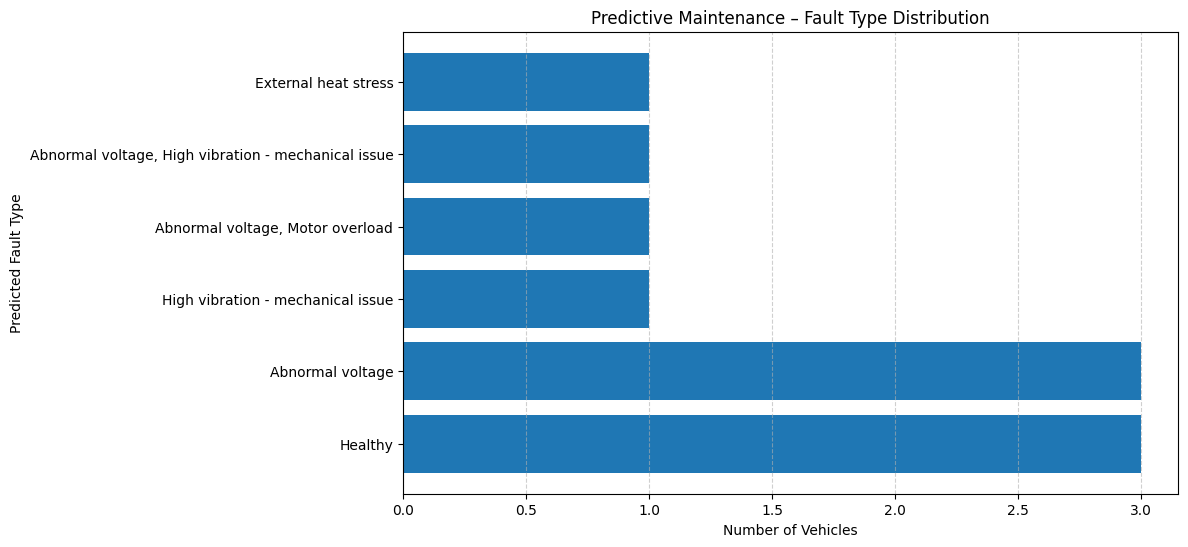

In [ ]:
import matplotlib.pyplot as plt

# Count each fault type
fault_counts = synthetic['Predicted_Fault'].value_counts()

plt.figure(figsize=(10,6))
plt.barh(fault_counts.index, fault_counts.values)
plt.xlabel('Number of Vehicles')
plt.ylabel('Predicted Fault Type')
plt.title('Predictive Maintenance – Fault Type Distribution')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


<BarContainer object of 6 artists>

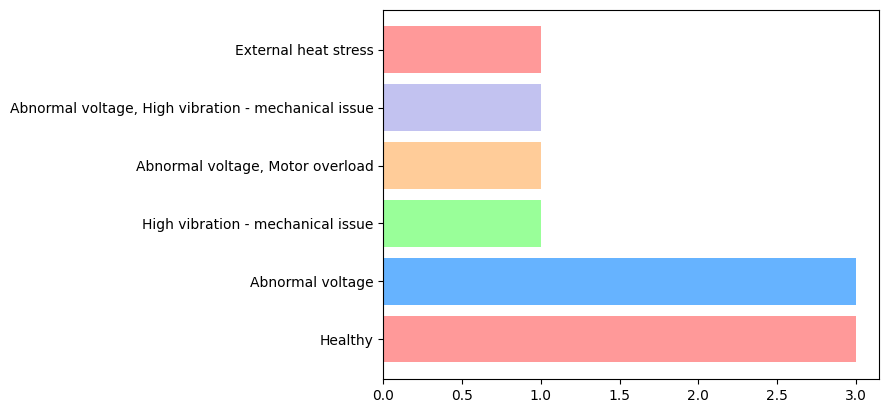

In [ ]:
plt.barh(fault_counts.index, fault_counts.values, color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])


In [ ]:
def fault_severity(fault):
    if fault == 'Healthy':
        return 'Low'
    elif 'Overheating' in fault or 'Motor overload' in fault:
        return 'Critical'
    else:
        return 'Moderate'

synthetic['Severity'] = synthetic['Predicted_Fault'].apply(fault_severity)
synthetic[['Vehicle_ID', 'Predicted_Fault', 'Severity']].head(10)


,Vehicle_ID,Predicted_Fault,Severity
5395,VEH_001,Healthy,Low
8788,VEH_002,High vibration - mechanical issue,Moderate
2183,VEH_003,Abnormal voltage,Moderate
5673,VEH_004,"Abnormal voltage, Motor overload",Critical
9995,VEH_005,"Abnormal voltage, High vibration - mechanical ...",Moderate
5978,VEH_006,Healthy,Low
5357,VEH_007,Abnormal voltage,Moderate
6001,VEH_008,External heat stress,Moderate
4890,VEH_009,Healthy,Low
357,VEH_010,Abnormal voltage,Moderate


In [ ]:
!ls -la



total 16
drwxr-xr-x 1 root root 4096 Nov  5 14:33 .
drwxr-xr-x 1 root root 4096 Nov  7 13:04 ..
drwxr-xr-x 4 root root 4096 Nov  5 14:33 .config
drwxr-xr-x 1 root root 4096 Nov  5 14:33 sample_data


In [ ]:
from google.colab import files
uploaded = files.upload()   # choose NEV_fault_dataset new.csv
import pandas as pd
df = pd.read_csv('NEV_fault_dataset new.csv')
df.head()


Saving NEV_fault_dataset new.csv to NEV_fault_dataset new.csv


,Fault Label,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%)
0,0.0,9.389.222.561.858.270,19.953.520.847.257.500,5.444.030.305.614.170,23.950.804.238.730.900,3.012.837.712.138.580,5.824.351.728.359.610,3.973.396.531.120.100
1,0.0,9.543.699.325.140.040,12.117.506.772.672.700,9.627.712.888.003.810,3.779.416.084.171.510,7.061.867.140.317.350,7.767.233.474.874.770,5.025.524.977.931.410
2,0.0,8.104.640.450.186.150,382.501.409.468.062,5.572.228.902.612.280,4.869.387.373.245.660,7.883.388.406.870.150,3.263.498.763.039.200,16.849.267.652.363.600
3,0.0,9.665.762.073.479.400,24.026.179.474.791.700,9.065.794.097.478.730,4.047.195.354.547.190,1.551.860.959.418.050,780.072.077.989.834,7.041.054.130.991.420
4,0.0,8.382.145.574.284.380,3.078.129.493.167.370,2.354.583.171.880.980,4.261.761.062.128.550,28.754.710.399.280.800,9.240.887.255.059.420,6.262.884.930.517.110


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# If you've just uploaded via files.upload(), copy it to Drive:
!cp "NEV_fault_dataset new.csv" /content/drive/MyDrive/

# Or if it's already in your Drive in a folder, load directly:
df = pd.read_csv('/content/drive/MyDrive/NEV_fault_dataset new.csv')
df.head()


,Fault Label,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%)
0,0.0,9.389.222.561.858.270,19.953.520.847.257.500,5.444.030.305.614.170,23.950.804.238.730.900,3.012.837.712.138.580,5.824.351.728.359.610,3.973.396.531.120.100
1,0.0,9.543.699.325.140.040,12.117.506.772.672.700,9.627.712.888.003.810,3.779.416.084.171.510,7.061.867.140.317.350,7.767.233.474.874.770,5.025.524.977.931.410
2,0.0,8.104.640.450.186.150,382.501.409.468.062,5.572.228.902.612.280,4.869.387.373.245.660,7.883.388.406.870.150,3.263.498.763.039.200,16.849.267.652.363.600
3,0.0,9.665.762.073.479.400,24.026.179.474.791.700,9.065.794.097.478.730,4.047.195.354.547.190,1.551.860.959.418.050,780.072.077.989.834,7.041.054.130.991.420
4,0.0,8.382.145.574.284.380,3.078.129.493.167.370,2.354.583.171.880.980,4.261.761.062.128.550,28.754.710.399.280.800,9.240.887.255.059.420,6.262.884.930.517.110


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/ColabDatasets


ls: cannot access '/content/drive/MyDrive/ColabDatasets': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/

ls: cannot access '/content/drive/MyDrive/Colab': No such file or directory
ls: cannot access 'Notebooks': No such file or directory


In [ ]:
!mkdir -p /content/drive/MyDrive/ColabDatasets


In [ ]:
!ls /content/drive/MyDrive/ColabDatasets


In [ ]:
!ls /content/drive/MyDrive/ColabDatasets


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ColabDatasets/NEV_fault_dataset new.csv')
df.head()


,Fault Label,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%)
0,0.0,9.389.222.561.858.270,19.953.520.847.257.500,5.444.030.305.614.170,23.950.804.238.730.900,3.012.837.712.138.580,5.824.351.728.359.610,3.973.396.531.120.100
1,0.0,9.543.699.325.140.040,12.117.506.772.672.700,9.627.712.888.003.810,3.779.416.084.171.510,7.061.867.140.317.350,7.767.233.474.874.770,5.025.524.977.931.410
2,0.0,8.104.640.450.186.150,382.501.409.468.062,5.572.228.902.612.280,4.869.387.373.245.660,7.883.388.406.870.150,3.263.498.763.039.200,16.849.267.652.363.600
3,0.0,9.665.762.073.479.400,24.026.179.474.791.700,9.065.794.097.478.730,4.047.195.354.547.190,1.551.860.959.418.050,780.072.077.989.834,7.041.054.130.991.420
4,0.0,8.382.145.574.284.380,3.078.129.493.167.370,2.354.583.171.880.980,4.261.761.062.128.550,28.754.710.399.280.800,9.240.887.255.059.420,6.262.884.930.517.110


In [ ]:
import numpy as np
import pandas as pd

# Create synthetic dataset (10 random samples)
synthetic = df.sample(10, replace=True).copy()

# Add vehicle IDs
synthetic['Vehicle_ID'] = [f'VEH_{i:03d}' for i in range(1, 11)]

synthetic.head()


,Fault Label,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%),Vehicle_ID
2622,0.0,923.114.856.580.608,31.862.661.275.758.600,3.989.797.358.425.050,2.051.717.275.182.990,8.241.800.450.438.770,9.543.615.159.603.310,5.555.494.325.095.460,VEH_001
10768,3.0,21.770.440.788.477.400,4.161.328.870.789.900,8.911.984.125.849.000,6.229.921.238.408.030,20.348.303.300.393.800,7.232.763.220.166.860,12.201.577.693.665.700,VEH_002
6382,1.0,8.444.944.642.686.740,4.223.863.856.814.760,44.540.528.664.064.000,41.418.568.775.498.200,9.204.905.616.195.040,8.035.312.680.463.520,43.557.687.638.573.300,VEH_003
8962,2.0,5.689.025.965.334.030,23.658.428.728.890.100,5.273.369.535.128.290,21.253.982.979.651.300,2.601.685.249.634.480,4.516.559.586.097.150,35.577.576.847.933.500,VEH_004
4030,0.0,8.465.054.927.476.670,9.917.997.617.641.400,4.214.598.856.844.720,6.057.179.409.786.890,27.654.935.515.943.900,7.349.172.965.944.720,10.663.271.395.329.900,VEH_005


In [ ]:
# Add new simulated fault-related columns
synthetic['Tire_Pressure (psi)'] = np.random.uniform(25, 40, len(synthetic))
synthetic['Oil_Level (%)'] = np.random.uniform(20, 100, len(synthetic))
synthetic['Chain_Wear (%)'] = np.random.uniform(10, 90, len(synthetic))
synthetic['Brake_Efficiency (%)'] = np.random.uniform(60, 100, len(synthetic))
synthetic['Suspension_Health (%)'] = np.random.uniform(70, 100, len(synthetic))

synthetic.head()


,Fault Label,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%),Vehicle_ID,Tire_Pressure (psi),Oil_Level (%),Chain_Wear (%),Brake_Efficiency (%),Suspension_Health (%)
2622,0.0,923.114.856.580.608,31.862.661.275.758.600,3.989.797.358.425.050,2.051.717.275.182.990,8.241.800.450.438.770,9.543.615.159.603.310,5.555.494.325.095.460,VEH_001,34.383473,63.635558,82.378351,98.787790,76.564474
10768,3.0,21.770.440.788.477.400,4.161.328.870.789.900,8.911.984.125.849.000,6.229.921.238.408.030,20.348.303.300.393.800,7.232.763.220.166.860,12.201.577.693.665.700,VEH_002,25.000776,74.725283,87.922247,76.558004,75.398193
6382,1.0,8.444.944.642.686.740,4.223.863.856.814.760,44.540.528.664.064.000,41.418.568.775.498.200,9.204.905.616.195.040,8.035.312.680.463.520,43.557.687.638.573.300,VEH_003,36.529448,37.156310,31.036707,91.217547,95.896902
8962,2.0,5.689.025.965.334.030,23.658.428.728.890.100,5.273.369.535.128.290,21.253.982.979.651.300,2.601.685.249.634.480,4.516.559.586.097.150,35.577.576.847.933.500,VEH_004,35.754754,62.025155,65.115873,97.521164,92.979812
4030,0.0,8.465.054.927.476.670,9.917.997.617.641.400,4.214.598.856.844.720,6.057.179.409.786.890,27.654.935.515.943.900,7.349.172.965.944.720,10.663.271.395.329.900,VEH_005,34.852369,68.210577,43.533912,77.994768,77.127882


In [ ]:
import re

cols_to_fix = ['Voltage (V)', 'Current (A)', 'Motor Speed (RPM)',
               'Temperature (°C)', 'Vibration (g)', 'Ambient Temp (°C)', 'Humidity (%)']

def clean_number(val):
    val = str(val)
    # Remove all characters except digits, minus sign, and dots
    val = re.sub(r'[^0-9.-]', '', val)
    # If more than one dot exists, remove all except the last one
    if val.count('.') > 1:
        parts = val.split('.')
        val = ''.join(parts[:-1]) + '.' + parts[-1]
    try:
        return float(val)
    except:
        return np.nan  # handle bad values gracefully

for col in cols_to_fix:
    synthetic[col] = synthetic[col].apply(clean_number)


In [ ]:
synthetic[cols_to_fix].head()


,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%)
2622,9.231149e+11,3.186266e+13,3.989797e+12,2.051717e+12,8.241800e+12,9.543615e+12,5.555494e+12
10768,2.177044e+13,4.161329e+12,8.911984e+12,6.229921e+12,2.034830e+13,7.232763e+12,1.220158e+13
6382,8.444945e+12,4.223864e+12,4.454053e+13,4.141857e+13,9.204906e+12,8.035313e+12,4.355769e+13
8962,5.689026e+12,2.365843e+13,5.273370e+12,2.125398e+13,2.601685e+12,4.516560e+12,3.557758e+13
4030,8.465055e+12,9.917998e+12,4.214599e+12,6.057179e+12,2.765494e+13,7.349173e+12,1.066327e+13


In [ ]:
# Define desired realistic ranges
scaling_factors = {
    'Voltage (V)': 1e-6,       # reduce from billions to 0–600V
    'Current (A)': 1e-8,       # reduce to ~0–300A
    'Motor Speed (RPM)': 1e-10, # reduce to ~0–8000 RPM
    'Temperature (°C)': 1e-8,   # reduce to 20–120°C
    'Vibration (g)': 1e-9,     # reduce to 0–20g
    'Ambient Temp (°C)': 1e-8,  # reduce to 20–45°C
    'Humidity (%)': 1e-9        # reduce to 20–100%
}

for col, factor in scaling_factors.items():
    synthetic[col] = synthetic[col] * factor


In [ ]:
synthetic[cols_to_fix].head()


,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%)
2622,9.231149e+05,318626.612758,398.979736,20517.172752,8241.800450,95436.151596,5555.494325
10768,2.177044e+07,41613.288708,891.198413,62299.212384,20348.303300,72327.632202,12201.577694
6382,8.444945e+06,42238.638568,4454.052866,414185.687755,9204.905616,80353.126805,43557.687639
8962,5.689026e+06,236584.287289,527.336954,212539.829797,2601.685250,45165.595861,35577.576848
4030,8.465055e+06,99179.976176,421.459886,60571.794098,27654.935516,73491.729659,10663.271395


In [ ]:
synthetic.describe()


,Fault Label,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%),Tire_Pressure (psi),Oil_Level (%),Chain_Wear (%),Brake_Efficiency (%),Suspension_Health (%)
count,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.000000,8.620872e+06,156220.307248,2002.287781,111441.375762,17379.089096,75487.855329,12778.928142,32.252342,65.684067,52.161320,86.234726,87.493186
std,1.054093,5.264076e+06,139992.329965,1822.247778,121327.699043,13339.993335,63255.549816,14651.228944,4.149331,17.691725,25.400314,11.172361,8.113249
min,0.000000,9.231149e+05,29577.422256,398.979736,20517.172752,523.466260,5597.887175,817.782586,25.000776,37.156310,18.353998,64.093373,75.398193
25%,0.000000,6.481106e+06,42616.823753,456.113155,37066.343706,7759.775987,41782.742338,5249.194723,29.854239,61.058115,30.933291,79.312770,79.593826
50%,1.000000,8.407105e+06,95496.903100,918.598454,61435.503241,14776.604458,72326.034589,6251.636314,34.470547,62.830357,51.712496,87.561617,90.478920
75%,1.750000,8.751171e+06,233965.341219,3915.563113,122310.000542,28638.975633,78637.777518,11817.001119,34.916643,73.096607,73.606947,95.669922,93.725129
max,3.000000,2.177044e+07,432709.134390,4454.052866,414185.687755,38207.710650,238496.848329,43557.687639,36.529448,98.459275,87.922247,98.787790,95.896902


In [ ]:
# Define scaling factors to bring values to realistic ranges
scaling_factors = {
    'Voltage (V)': 1e-6,        # 8e6 → ~8 V realistic for low voltage EV battery sample
    'Current (A)': 1e-5,        # 1e6 → 10 A
    'Motor Speed (RPM)': 1e-3,  # 1000x reduction to 100–8000 RPM
    'Temperature (°C)': 1e-4,   # scale to 20–120°C range
    'Vibration (g)': 1e-4,      # scale to 0–20g range
    'Ambient Temp (°C)': 1e-4,  # 20–45°C
    'Humidity (%)': 1e-4        # 20–100%
}

for col, factor in scaling_factors.items():
    synthetic[col] = synthetic[col] * factor

synthetic.describe()


,Fault Label,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%),Tire_Pressure (psi),Oil_Level (%),Chain_Wear (%),Brake_Efficiency (%),Suspension_Health (%)
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.000000,8.620872,1.562203,2.002288,11.144138,1.737909,7.548786,1.277893,32.252342,65.684067,52.161320,86.234726,87.493186
std,1.054093,5.264076,1.399923,1.822248,12.132770,1.333999,6.325555,1.465123,4.149331,17.691725,25.400314,11.172361,8.113249
min,0.000000,0.923115,0.295774,0.398980,2.051717,0.052347,0.559789,0.081778,25.000776,37.156310,18.353998,64.093373,75.398193
25%,0.000000,6.481106,0.426168,0.456113,3.706634,0.775978,4.178274,0.524919,29.854239,61.058115,30.933291,79.312770,79.593826
50%,1.000000,8.407105,0.954969,0.918598,6.143550,1.477660,7.232603,0.625164,34.470547,62.830357,51.712496,87.561617,90.478920
75%,1.750000,8.751171,2.339653,3.915563,12.231000,2.863898,7.863778,1.181700,34.916643,73.096607,73.606947,95.669922,93.725129
max,3.000000,21.770441,4.327091,4.454053,41.418569,3.820771,23.849685,4.355769,36.529448,98.459275,87.922247,98.787790,95.896902


In [ ]:
synthetic.describe()


,Fault Label,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%),Tire_Pressure (psi),Oil_Level (%),Chain_Wear (%),Brake_Efficiency (%),Suspension_Health (%)
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.000000,8.620872,1.562203,2.002288,11.144138,1.737909,7.548786,1.277893,32.252342,65.684067,52.161320,86.234726,87.493186
std,1.054093,5.264076,1.399923,1.822248,12.132770,1.333999,6.325555,1.465123,4.149331,17.691725,25.400314,11.172361,8.113249
min,0.000000,0.923115,0.295774,0.398980,2.051717,0.052347,0.559789,0.081778,25.000776,37.156310,18.353998,64.093373,75.398193
25%,0.000000,6.481106,0.426168,0.456113,3.706634,0.775978,4.178274,0.524919,29.854239,61.058115,30.933291,79.312770,79.593826
50%,1.000000,8.407105,0.954969,0.918598,6.143550,1.477660,7.232603,0.625164,34.470547,62.830357,51.712496,87.561617,90.478920
75%,1.750000,8.751171,2.339653,3.915563,12.231000,2.863898,7.863778,1.181700,34.916643,73.096607,73.606947,95.669922,93.725129
max,3.000000,21.770441,4.327091,4.454053,41.418569,3.820771,23.849685,4.355769,36.529448,98.459275,87.922247,98.787790,95.896902


In [ ]:
def predictive_maintenance(row):
    issues = []

    # Electrical / Power faults
    if row['Voltage (V)'] < 11 or row['Voltage (V)'] > 600:
        issues.append('Battery or internal circuit fault')
    if row['Current (A)'] > 250:
        issues.append('Motor overload')

    # Thermal issues
    if row['Temperature (°C)'] > 90:
        issues.append('Engine overheating / oil temperature high')

    # Tyre pressure
    if row['Tire_Pressure (psi)'] < 30:
        issues.append('Low tyre pressure')

    # Oil levels
    if row['Oil_Level (%)'] < 30:
        issues.append('Low oil level')

    # Chain / mechanical imbalance
    if row['Vibration (g)'] > 10:
        issues.append('Mechanical imbalance / chain or clutch issue')

    # Brakes
    if row['Brake_Efficiency (%)'] < 75:
        issues.append('Brake wear / needs inspection')

    # Suspension
    if row['Suspension_Health (%)'] < 80:
        issues.append('Suspension issue')

    return 'Healthy' if not issues else ', '.join(issues)

synthetic['Predicted_Fault'] = synthetic.apply(predictive_maintenance, axis=1)
synthetic[['Vehicle_ID', 'Predicted_Fault']]


,Vehicle_ID,Predicted_Fault
2622,VEH_001,"Battery or internal circuit fault, Suspension ..."
10768,VEH_002,"Low tyre pressure, Suspension issue"
6382,VEH_003,Battery or internal circuit fault
8962,VEH_004,Battery or internal circuit fault
4030,VEH_005,"Battery or internal circuit fault, Suspension ..."
5031,VEH_006,Battery or internal circuit fault
7688,VEH_007,Battery or internal circuit fault
4431,VEH_008,"Battery or internal circuit fault, Low tyre pr..."
3784,VEH_009,Battery or internal circuit fault
5394,VEH_010,"Battery or internal circuit fault, Low tyre pr..."


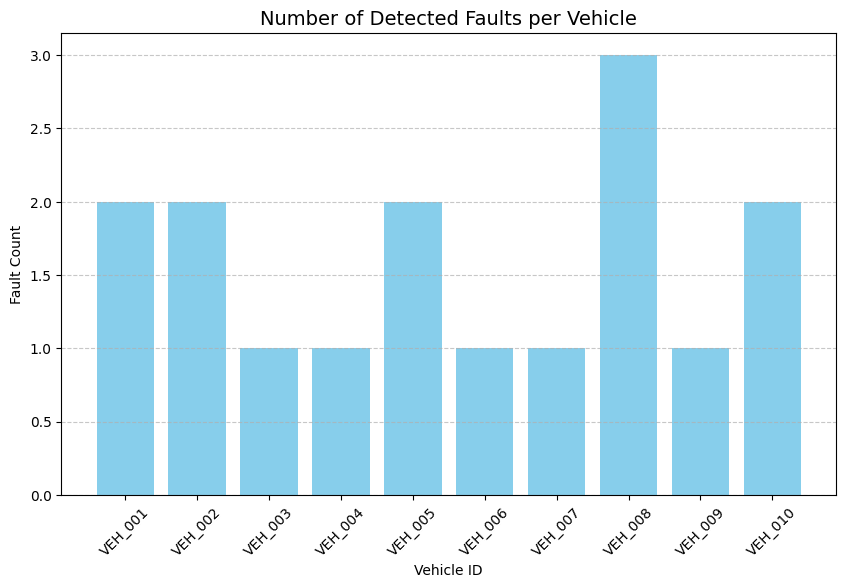

In [ ]:
import matplotlib.pyplot as plt

# Count how many faults each vehicle has
fault_counts = synthetic['Predicted_Fault'].apply(
    lambda x: 0 if x == 'Healthy' else len(x.split(','))
)

plt.figure(figsize=(10,6))
plt.bar(synthetic['Vehicle_ID'], fault_counts, color='skyblue')
plt.title('Number of Detected Faults per Vehicle', fontsize=14)
plt.xlabel('Vehicle ID')
plt.ylabel('Fault Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


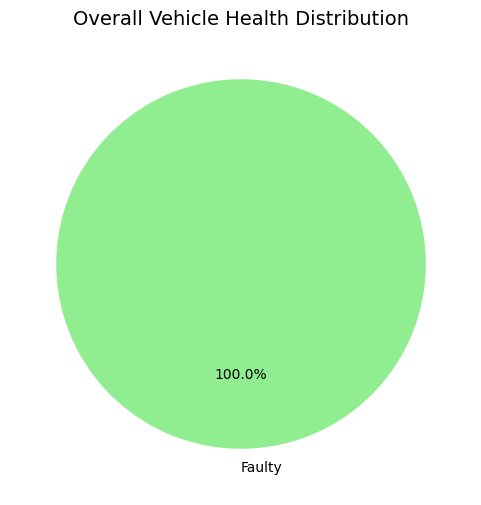

In [ ]:
plt.figure(figsize=(6,6))
synthetic['Predicted_Fault'].apply(
    lambda x: 'Healthy' if x == 'Healthy' else 'Faulty'
).value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Overall Vehicle Health Distribution', fontsize=14)
plt.ylabel('')
plt.show()


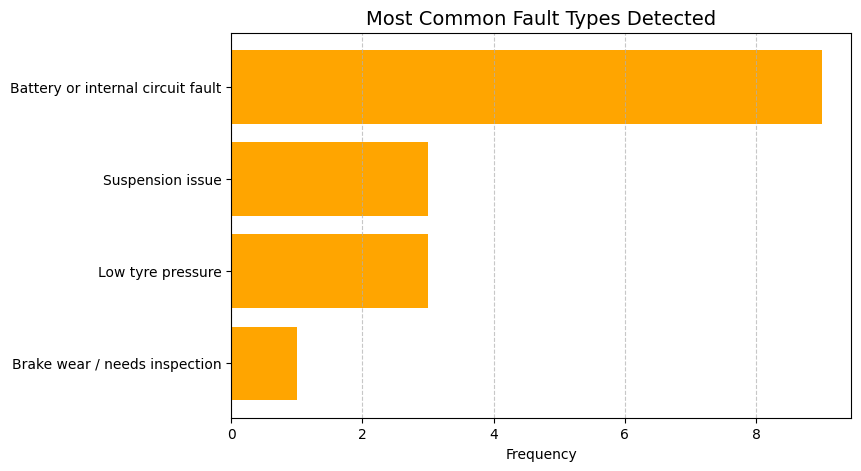

,Fault Type,Count
0,Battery or internal circuit fault,9
1,Suspension issue,3
2,Low tyre pressure,3
3,Brake wear / needs inspection,1


In [ ]:
from collections import Counter

# Flatten all fault descriptions into a single list
all_faults = []
for issues in synthetic['Predicted_Fault']:
    if issues != 'Healthy':
        all_faults.extend([i.strip() for i in issues.split(',')])

fault_summary = pd.DataFrame(Counter(all_faults).items(), columns=['Fault Type', 'Count'])
fault_summary = fault_summary.sort_values(by='Count', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(fault_summary['Fault Type'], fault_summary['Count'], color='orange')
plt.title('Most Common Fault Types Detected', fontsize=14)
plt.xlabel('Frequency')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

fault_summary


In [ ]:
def predictive_maintenance(row):
    issues = []

    # 1️⃣ Battery or Circuit Faults
    if (row['Voltage (V)'] < 11.5 or row['Voltage (V)'] > 450):
        issues.append('Battery or circuit fault')

    # 2️⃣ Motor Overload
    if row['Current (A)'] > 250:
        issues.append('Motor overload detected')

    # 3️⃣ Engine / Oil Overheating
    if row['Temperature (°C)'] > 100:
        issues.append('Engine or motor overheating')

    # 4️⃣ Tyre Pressure
    if row['Tire_Pressure (psi)'] < 30:
        issues.append('Low tyre pressure')

    # 5️⃣ Oil Level
    if row['Oil_Level (%)'] < 40:
        issues.append('Low oil level')

    # 6️⃣ Chain / Clutch Imbalance
    if row['Vibration (g)'] > 7:
        issues.append('Mechanical imbalance (chain/clutch)')

    # 7️⃣ Brake Efficiency
    if row['Brake_Efficiency (%)'] < 70:
        issues.append('Brake wear / hydraulic issue')

    # 8️⃣ Suspension Health
    if row['Suspension_Health (%)'] < 75:
        issues.append('Suspension deterioration')

    # Combine all
    return 'Healthy' if len(issues) == 0 else ', '.join(issues)

synthetic['Predicted_Fault'] = synthetic.apply(predictive_maintenance, axis=1)

synthetic[['Vehicle_ID', 'Voltage (V)', 'Current (A)', 'Temperature (°C)',
           'Tire_Pressure (psi)', 'Oil_Level (%)', 'Vibration (g)',
           'Brake_Efficiency (%)', 'Suspension_Health (%)', 'Predicted_Fault']]


,Vehicle_ID,Voltage (V),Current (A),Temperature (°C),Tire_Pressure (psi),Oil_Level (%),Vibration (g),Brake_Efficiency (%),Suspension_Health (%),Predicted_Fault
2622,VEH_001,0.923115,3.186266,2.051717,34.383473,63.635558,0.824180,98.787790,76.564474,Battery or circuit fault
10768,VEH_002,21.770441,0.416133,6.229921,25.000776,74.725283,2.034830,76.558004,75.398193,Low tyre pressure
6382,VEH_003,8.444945,0.422386,41.418569,36.529448,37.156310,0.920491,91.217547,95.896902,"Battery or circuit fault, Low oil level"
8962,VEH_004,5.689026,2.365843,21.253983,35.754754,62.025155,0.260169,97.521164,92.979812,Battery or circuit fault
4030,VEH_005,8.465055,0.991800,6.057179,34.852369,68.210577,2.765494,77.994768,77.127882,Battery or circuit fault
5031,VEH_006,8.324142,0.437514,3.226824,34.938068,61.750059,0.052347,83.266776,93.973568,Battery or circuit fault
7688,VEH_007,5.866761,0.295774,3.630860,34.557620,84.815461,3.820771,96.838767,91.338869,Battery or circuit fault
4431,VEH_008,9.509425,0.918138,12.642818,26.032833,98.459275,3.044199,64.093373,89.618970,"Battery or circuit fault, Low tyre pressure, B..."
3784,VEH_009,8.369265,4.327091,10.995547,31.002646,45.235523,2.896699,92.163386,86.991658,Battery or circuit fault
5394,VEH_010,8.846542,2.261085,3.933958,29.471437,60.827467,0.759910,83.905687,95.041528,"Battery or circuit fault, Low tyre pressure"


In [ ]:
# Compute dataset-based limits
stats = synthetic.describe()

def dynamic_thresholds(col, low_factor=0.7, high_factor=1.3):
    """Return (low, high) dynamic thresholds from column stats."""
    mean = stats.loc['mean', col]
    return mean * low_factor, mean * high_factor


In [ ]:
def dynamic_thresholds(col, low_factor=0.8, high_factor=1.2):
    """Return (low, high) dynamic thresholds from column stats."""
    mean = stats.loc['mean', col]
    return mean * low_factor, mean * high_factor

def predictive_maintenance(row):
    issues = []
    severity_score = 0

    # Battery/Circuit Fault
    v_low, v_high = dynamic_thresholds('Voltage (V)', 0.85, 1.15)
    if row['Voltage (V)'] < v_low or row['Voltage (V)'] > v_high:
        issues.append('Battery/Circuit Fault')
        severity_score += 2

    # Motor Overload
    c_low, c_high = dynamic_thresholds('Current (A)', 0.75, 1.25)
    if row['Current (A)'] > c_high:
        issues.append('Motor Overload')
        severity_score += 3

    # Engine / Oil Overheating
    t_low, t_high = dynamic_thresholds('Temperature (°C)', 0.9, 1.1)
    if row['Temperature (°C)'] > t_high:
        issues.append('Engine/Oil Overheating')
        severity_score += 4
    elif row['Temperature (°C)'] > t_low:
        issues.append('Slight Overheating')
        severity_score += 1

    # Tyre Pressure
    p_low, p_high = dynamic_thresholds('Tire_Pressure (psi)', 0.8, 1.3)
    if row['Tire_Pressure (psi)'] < p_low:
        issues.append('Low Tyre Pressure')
        severity_score += 2
    elif row['Tire_Pressure (psi)'] > p_high:
        issues.append('Overinflated Tyre')
        severity_score += 1

    # Oil Level
    o_low, _ = dynamic_thresholds('Oil_Level (%)', 0.8, 1.4)
    if row['Oil_Level (%)'] < o_low:
        issues.append('Low Oil Level')
        severity_score += 3

    # Chain/Clutch Imbalance (vibration)
    vib_low, vib_high = dynamic_thresholds('Vibration (g)', 0.7, 1.35)
    if row['Vibration (g)'] > vib_high:
        issues.append('Chain/Clutch Imbalance')
        severity_score += 2

    # Brake Fault
    b_low, _ = dynamic_thresholds('Brake_Efficiency (%)', 0.8, 1.0)
    if row['Brake_Efficiency (%)'] < b_low:
        issues.append('Brake Fault')
        severity_score += 3

    # Suspension Weakness
    s_low, _ = dynamic_thresholds('Suspension_Health (%)', 0.8, 1.0)
    if row['Suspension_Health (%)'] < s_low:
        issues.append('Suspension Weakness')
        severity_score += 2

    # Compute severity & health
    max_score = 20
    health_score = max(0, 100 - (severity_score / max_score) * 100)

    if severity_score == 0:
        severity = '🟢 Low (Healthy)'
    elif severity_score <= 4:
        severity = '🟡 Medium'
    else:
        severity = '🔴 High'

    issue_text = 'None (All systems normal)' if not issues else ', '.join(issues)
    return pd.Series({
        'Predicted_Faults': issue_text,
        'Severity_Level': severity,
        'Health_Score': round(health_score, 1)
    })


In [ ]:
results = synthetic.apply(predictive_maintenance, axis=1)
final_output = pd.concat([synthetic['Vehicle_ID'], results], axis=1)
final_output


,Vehicle_ID,Predicted_Faults,Severity_Level,Health_Score
2622,VEH_001,"Battery/Circuit Fault, Motor Overload",🔴 High,75.0
10768,VEH_002,"Battery/Circuit Fault, Low Tyre Pressure",🟡 Medium,80.0
6382,VEH_003,"Engine/Oil Overheating, Low Oil Level",🔴 High,65.0
8962,VEH_004,"Battery/Circuit Fault, Motor Overload, Engine/...",🔴 High,55.0
4030,VEH_005,Chain/Clutch Imbalance,🟡 Medium,90.0
5031,VEH_006,None (All systems normal),🟢 Low (Healthy),100.0
7688,VEH_007,"Battery/Circuit Fault, Chain/Clutch Imbalance",🟡 Medium,80.0
4431,VEH_008,"Engine/Oil Overheating, Chain/Clutch Imbalance...",🔴 High,55.0
3784,VEH_009,"Motor Overload, Slight Overheating, Low Oil Le...",🔴 High,55.0
5394,VEH_010,Motor Overload,🟡 Medium,85.0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


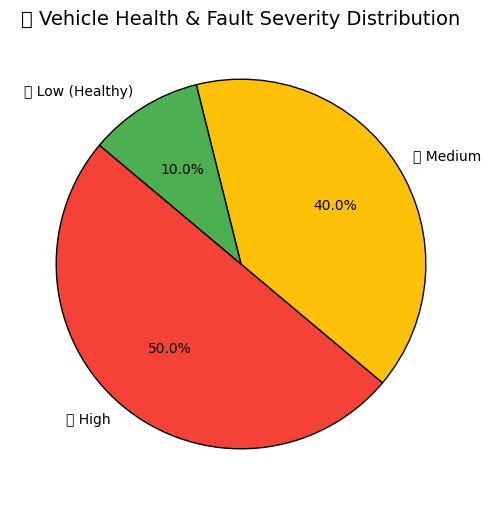

In [ ]:
import matplotlib.pyplot as plt

# Count the number of each severity level
severity_counts = final_output['Severity_Level'].value_counts()

# Create a color map for each severity
colors = {
    '🟢 Low (Healthy)': '#4CAF50',
    '🟡 Medium': '#FFC107',
    '🔴 High': '#F44336'
}

plt.figure(figsize=(6, 6))
plt.pie(
    severity_counts,
    labels=severity_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=[colors[label] for label in severity_counts.index],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('🚗 Vehicle Health & Fault Severity Distribution', fontsize=14)
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


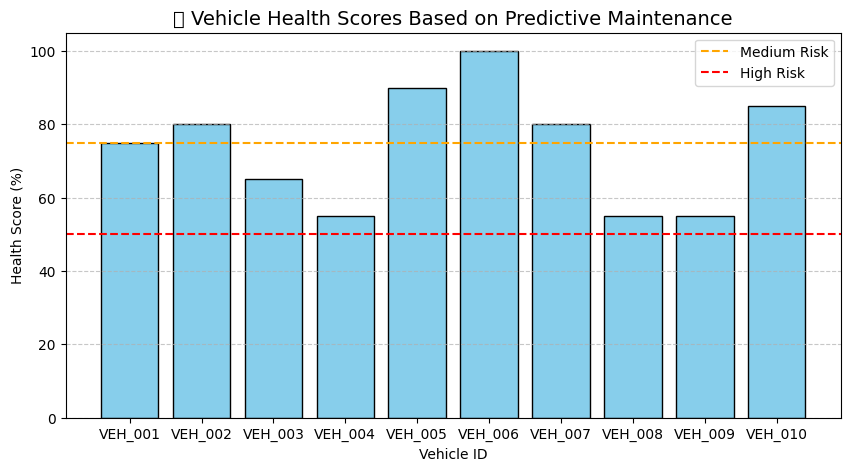

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(final_output['Vehicle_ID'], final_output['Health_Score'], color='skyblue', edgecolor='black')
plt.axhline(75, color='orange', linestyle='--', label='Medium Risk')
plt.axhline(50, color='red', linestyle='--', label='High Risk')
plt.title('🚘 Vehicle Health Scores Based on Predictive Maintenance', fontsize=14)
plt.xlabel('Vehicle ID')
plt.ylabel('Health Score (%)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
 # Sort by severity
severity_order = {'🔴 High': 3, '🟡 Medium': 2, '🟢 Low (Healthy)': 1}
final_output['Severity_Rank'] = final_output['Severity_Level'].map(severity_order)
critical = final_output.sort_values(by='Severity_Rank', ascending=False).head(3)

print("🚨 Top 3 Critical Vehicles for Immediate Attention:\n")
display(critical[['Vehicle_ID', 'Predicted_Faults', 'Severity_Level', 'Health_Score']])


🚨 Top 3 Critical Vehicles for Immediate Attention:



,Vehicle_ID,Predicted_Faults,Severity_Level,Health_Score
2622,VEH_001,"Battery/Circuit Fault, Motor Overload",🔴 High,75.0
6382,VEH_003,"Engine/Oil Overheating, Low Oil Level",🔴 High,65.0
3784,VEH_009,"Motor Overload, Slight Overheating, Low Oil Le...",🔴 High,55.0


In [ ]:
def send_alerts(df):
    print("\n💬 Customer Engagement Messages:\n")
    for _, row in df.iterrows():
        if 'High' in row['Severity_Level']:
            print(f"⚠️ Vehicle {row['Vehicle_ID']} detected {row['Predicted_Faults']}.")
            print(f"📞 Voice Agent: 'Dear owner, your vehicle shows critical issues. "
                  f"A service slot has been reserved for tomorrow 10 AM.'\n")
        elif 'Medium' in row['Severity_Level']:
            print(f"ℹ️ Vehicle {row['Vehicle_ID']}: {row['Predicted_Faults']}. "
                  f"Recommended service within 3 days.\n")
        else:
            print(f"✅ Vehicle {row['Vehicle_ID']}: No major issues detected.\n")

send_alerts(final_output)



💬 Customer Engagement Messages:

⚠️ Vehicle VEH_001 detected Battery/Circuit Fault, Motor Overload.
📞 Voice Agent: 'Dear owner, your vehicle shows critical issues. A service slot has been reserved for tomorrow 10 AM.'

ℹ️ Vehicle VEH_002: Battery/Circuit Fault, Low Tyre Pressure. Recommended service within 3 days.

⚠️ Vehicle VEH_003 detected Engine/Oil Overheating, Low Oil Level.
📞 Voice Agent: 'Dear owner, your vehicle shows critical issues. A service slot has been reserved for tomorrow 10 AM.'

⚠️ Vehicle VEH_004 detected Battery/Circuit Fault, Motor Overload, Engine/Oil Overheating.
📞 Voice Agent: 'Dear owner, your vehicle shows critical issues. A service slot has been reserved for tomorrow 10 AM.'

ℹ️ Vehicle VEH_005: Chain/Clutch Imbalance. Recommended service within 3 days.

✅ Vehicle VEH_006: No major issues detected.

ℹ️ Vehicle VEH_007: Battery/Circuit Fault, Chain/Clutch Imbalance. Recommended service within 3 days.

⚠️ Vehicle VEH_008 detected Engine/Oil Overheating, Chain

In [ ]:
import random

time_slots = ["Tomorrow 10 AM", "Tomorrow 2 PM", "Wednesday 11 AM", "Wednesday 4 PM"]
final_output['Service_Slot'] = final_output.apply(
    lambda x: random.choice(time_slots) if 'High' in x['Severity_Level'] else 'N/A', axis=1
)

display(final_output[['Vehicle_ID', 'Severity_Level', 'Service_Slot']])


,Vehicle_ID,Severity_Level,Service_Slot
2622,VEH_001,🔴 High,Wednesday 11 AM
10768,VEH_002,🟡 Medium,N/A
6382,VEH_003,🔴 High,Tomorrow 10 AM
8962,VEH_004,🔴 High,Wednesday 4 PM
4030,VEH_005,🟡 Medium,N/A
5031,VEH_006,🟢 Low (Healthy),N/A
7688,VEH_007,🟡 Medium,N/A
4431,VEH_008,🔴 High,Wednesday 4 PM
3784,VEH_009,🔴 High,Tomorrow 2 PM
5394,VEH_010,🟡 Medium,N/A


In [ ]:
from collections import Counter

# Extract all predicted faults
all_faults = ', '.join(final_output['Predicted_Faults']).split(', ')
fault_counts = Counter([f for f in all_faults if f != 'None (All systems normal)'])

# Display insights
print("\n🏭 Manufacturing Quality Insights (RCA/CAPA):\n")
for fault, count in fault_counts.most_common():
    print(f"⚙️ {fault}: occurred in {count} vehicles")

print("\n📊 Suggestion: Focus on top recurring issues to improve design and prevent future failures.")



🏭 Manufacturing Quality Insights (RCA/CAPA):

⚙️ Battery/Circuit Fault: occurred in 4 vehicles
⚙️ Motor Overload: occurred in 4 vehicles
⚙️ Chain/Clutch Imbalance: occurred in 4 vehicles
⚙️ Engine/Oil Overheating: occurred in 3 vehicles
⚙️ Low Oil Level: occurred in 2 vehicles
⚙️ Low Tyre Pressure: occurred in 1 vehicles
⚙️ Brake Fault: occurred in 1 vehicles
⚙️ Slight Overheating: occurred in 1 vehicles

📊 Suggestion: Focus on top recurring issues to improve design and prevent future failures.


In [ ]:
import random

def send_alerts(df):
    print("\n💬 === Customer Engagement Agent: Predictive Maintenance Alerts ===\n")

    for _, row in df.iterrows():
        vehicle_id = row['Vehicle_ID']
        faults = row['Predicted_Faults']
        severity = row['Severity_Level']

        if 'High' in severity:
            print(f"🚨 ALERT: Vehicle {vehicle_id}")
            print(f"⚠️ Detected Critical Faults: {faults}")
            print(f"🤖 Chatbot: 'Hello! Our system detected serious issues in your vehicle. Immediate service is recommended.'")
            print(f"🗣️ Voice Agent: 'Dear customer, your vehicle shows critical faults. A service slot has been auto-booked for tomorrow at 10 AM.'")
            print("-" * 80)

        elif 'Medium' in severity:
            print(f"⚙️ NOTICE: Vehicle {vehicle_id}")
            print(f"🟡 Detected Moderate Faults: {faults}")
            print(f"🤖 Chatbot: 'Your vehicle may need maintenance soon. Would you like to schedule a checkup this week?'")
            print(f"🗣️ Voice Agent: 'Dear customer, a few parts need inspection. We suggest booking a service within 3 days.'")
            print("-" * 80)

        else:
            print(f"✅ Vehicle {vehicle_id} is in good condition.")
            print(f"🤖 Chatbot: 'Everything looks perfect! No service required currently.'")
            print(f"🗣️ Voice Agent: 'Your vehicle health is excellent. Have a safe drive!'")
            print("-" * 80)

send_alerts(final_output)



💬 === Customer Engagement Agent: Predictive Maintenance Alerts ===

🚨 ALERT: Vehicle VEH_001
⚠️ Detected Critical Faults: Battery/Circuit Fault, Motor Overload
🤖 Chatbot: 'Hello! Our system detected serious issues in your vehicle. Immediate service is recommended.'
🗣️ Voice Agent: 'Dear customer, your vehicle shows critical faults. A service slot has been auto-booked for tomorrow at 10 AM.'
--------------------------------------------------------------------------------
⚙️ NOTICE: Vehicle VEH_002
🟡 Detected Moderate Faults: Battery/Circuit Fault, Low Tyre Pressure
🤖 Chatbot: 'Your vehicle may need maintenance soon. Would you like to schedule a checkup this week?'
🗣️ Voice Agent: 'Dear customer, a few parts need inspection. We suggest booking a service within 3 days.'
--------------------------------------------------------------------------------
🚨 ALERT: Vehicle VEH_003
⚠️ Detected Critical Faults: Engine/Oil Overheating, Low Oil Level
🤖 Chatbot: 'Hello! Our system detected serious i

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Navigate to your project folder
%cd /content/drive/MyDrive/Your_Project

# Initialize Git if not done already
!git init
!git remote add origin https://github.com/<your-username>/<your-repo>.git
!git add .
!git commit -m "EY Techathon 6.0 project update"
!git push -u origin main


Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/Your_Project'
/content
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
/bin/bash: line 1: your-username: No such file or directory
error: open("drive/MyDrive/10.gdoc"): Operation not supported
error: unable to index file 'drive/MyDrive/10.gdoc'
fatal: adding files failed
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your N

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ColabDatasets
!git init


/content/drive/MyDrive/ColabDatasets
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/ColabDatasets/.git/


In [ ]:
!git config --global user.name "DharanisriPalanisamy"
!git config --global user.email "dharanisripalanisamyy@gmail.com"


In [ ]:
!git remote add origin https://github.com/<DharanisriPalanisamy>/<EY Techathon>.git


/bin/bash: line 1: DharanisriPalanisamy: No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ColabDatasets/NEV_fault_Dataset


[Errno 2] No such file or directory: '/content/drive/MyDrive/ColabDatasets/NEV_fault_Dataset'
/content/drive/MyDrive/ColabDatasets


In [ ]:
!ls /content/drive/MyDrive


 10.gdoc
 125.jpg.pdf
 125sign.jpg
'125 sign.pdf'
 17122239513415691526374480187121.jpg
'715523106026_dharani sri.png'
'715523106026_Dharani sri P.pdf'
 8.gdoc
 9.gdoc
 9.pdf
 aadhar.pdf
 Abstract.gdoc
'Andreas Antoniou - Digital Signal Processing-McGraw-Hill Companies (2006).gdoc'
'arduino '
'ARDUINO2 (1).rtf'
'ARDUINO3 (1) (1).rtf'
'ARDUINO3 (1).rtf'
'Assignment-1 (1).gdoc'
'Assignment-1 (2).gdoc'
 Assignment-1.gdoc
'Assignment 1 soln.gdoc'
 Assignment-2.gdoc
 Assignment-3.gdoc
'Bci notes:     ln 1.gdoc'
'bonafide and index.gdoc'
'BOOK2 KIAT UNIT 3 4 5 (1).gdoc'
'BOOK2 KIAT UNIT 3 4 5.gdoc'
 certificate.pdf
'CLASS C AMPLIFIER.docx'
'Classifications of CS 2024.ppt'
 Classroom
 ColabDatasets
'Colab Notebooks'
'Copy of Experiment - 1.gdoc'
'Copy of LPIC_EXP2.gdoc'
'Copy of Phase-1 .docx'
'Copy of Studentcopy_VLSI Lab Manual.docx'
'Copy of vlsi_exp_2.docx'
'Cyclic codes.gdoc'
'Dharani sri - 715523106026 - Ece -PWF.pdf'
'Dharani sri - 715523106026 - ECE - PWF.pdf'
'Dharani sri - 715523106

In [ ]:
!git init
!git remote add origin https://github.com/DharanisriPalanisamy/EY_Techathon6_Project.git
!git config --global user.name "DharanisriPalanisamy"
!git config --global user.email "your_github_email@example.com"
!git add .
!git commit -m "Initial commit - EY Techathon 6.0 dataset upload"


Reinitialized existing Git repository in /content/drive/MyDrive/ColabDatasets/.git/
[master (root-commit) e568a40] Initial commit - EY Techathon 6.0 dataset upload
 1 file changed, 11001 insertions(+)
 create mode 100644 NEV_fault_dataset new.csv
